<a href="https://colab.research.google.com/github/gjsin1105/DAP__/blob/main/FinalProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 2010년부터 2021년까지 스포츠의 종류에 따른 선수들의 수입 비교

* 수입(Earning)의 기본 단위는 백만달러(million of $)이다.
* 13종류의 스포츠가 있으며 각 스포츠별로 속한 선수의 수가 천차만별일 수도 있다.

##Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

##Get the Data
각 스포츠별로 선수들의 수입을 저장한 데이터를 가져온다.

In [2]:
df = pd.read_csv('athlete/forbesathletesv2.csv')
df

,Name,Earnings,Year,Sport
0,Conor McGregor,180.0,2021,Mixed Martial Arts
1,Lionel Messi,130.0,2021,Soccer
2,Cristiano Ronaldo,120.0,2021,Soccer
3,Dak Prescott,107.5,2021,Football
4,LeBron James,96.5,2021,Basketball
...,...,...,...,...
1045,Paul Pierce,21.8,2010,Basketball
1046,CC Sabathia,21.4,2010,Baseball
1047,Matthew Stafford,21.4,2010,Football
1048,Vince Carter,21.3,2010,Basketball


##The number of athletes in each sport
각 스포츠별로 해당 스포츠에 속하는 선수의 수가 어느정도인지 알아본다.

In [16]:
df["Sport"].value_counts()

Basketball            274
Football              210
Baseball              195
Soccer                130
Racing                 64
Tennis                 61
Golf                   55
Boxing                 37
Cricket                10
Track                   7
Mixed Martial Arts      4
MMA                     2
Cycling                 1
Name: Sport, dtype: int64

##Total income for each sport
스포츠 종류별로 해당 스포츠에 속한 선수들의 수입을 합하고 각 스포츠별로 어느 정도의 수입을 기록했는지 오름차순으로 정렬한다.




In [4]:
sport_total = df.groupby('Sport')['Earnings'].sum().sort_values()
sport_total

Sport
Cycling                 21.0
MMA                     56.0
Track                  186.4
Cricket                256.6
Mixed Martial Arts     374.0
Racing                1985.3
Boxing                2103.8
Golf                  2225.9
Tennis                2398.9
Baseball              4659.5
Soccer                4969.7
Football              6546.2
Basketball            8845.6
Name: Earnings, dtype: float64

##Average income for each sport
각 스포츠가 기록한 총 수입을 가지고 스포츠별로 평균 수입이 어느정도인지 비교해본다.
(bar plot 사용)

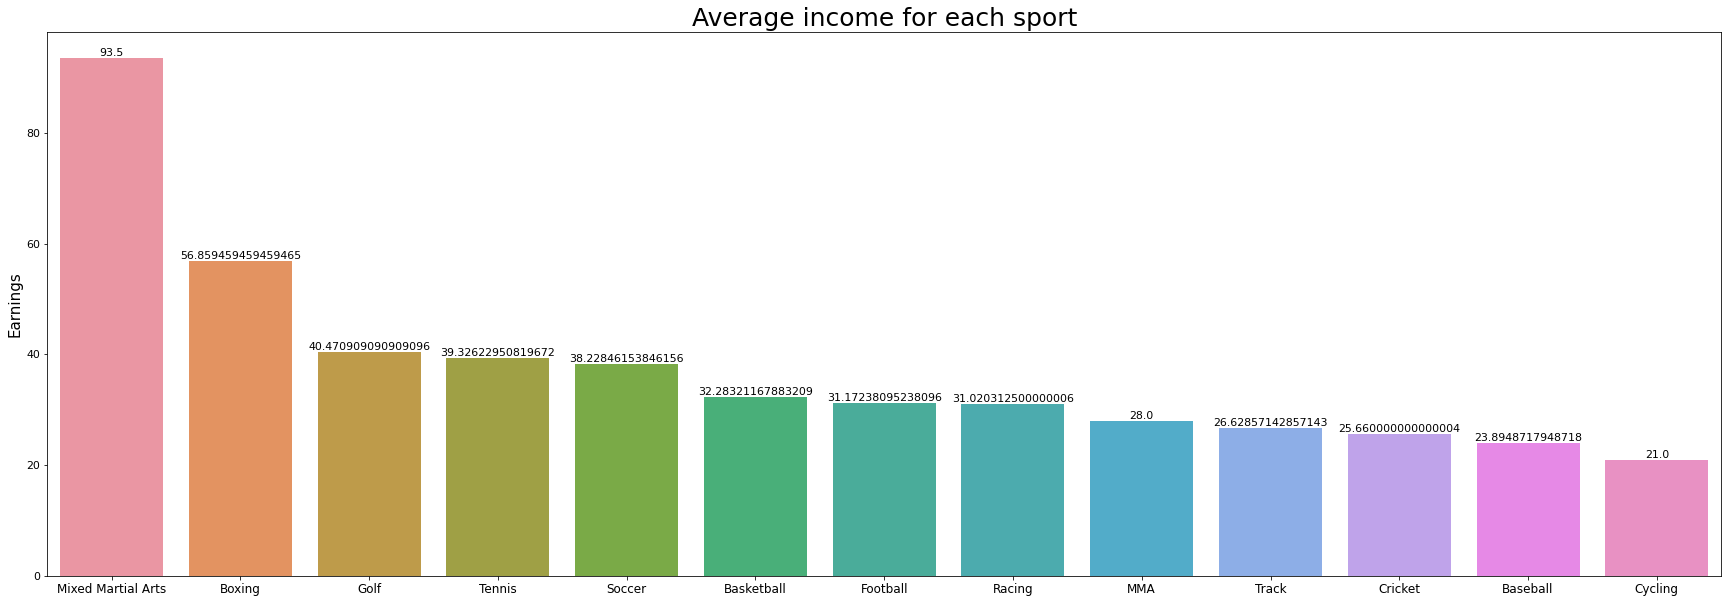

In [41]:
plt.figure(figsize = (30, 10))
plt.title("Average income for each sport", size=25)
plt.xticks(fontsize=12)
plt.ylabel('Earnings', size=15)
x = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
avgtotal = df.groupby('Sport')['Earnings'].mean().sort_values(ascending=False)
for i, v in enumerate(x):
    plt.text(v, avgtotal[i], avgtotal[i],
             fontsize = 11, 
             color='black',
             horizontalalignment='center',
             verticalalignment='bottom')
sport_kind = [sport for sport in avgtotal.index]
sns.barplot(x=sport_kind, y=avgtotal)
plt.show()

##The income of the top 5 athletes
2010년부터 2021년까지의 선수들 개인의 총 수입을 구하고 오름차순으로 정렬한다.

In [9]:
athlete_total = df.groupby('Name')['Earnings'].sum().sort_values()
athlete_total

Name
Samuel Etoo           16.4
AJ Burnett            16.6
Jake Peavy            16.6
Brandon Roy           16.6
Rolando McClain       16.7
                     ...  
LeBron James         820.5
Roger Federer        836.1
Lionel Messi         911.5
Floyd Mayweather     918.0
Cristiano Ronaldo    942.9
Name: Earnings, Length: 372, dtype: float64

위에서 구한 선수들 개인의 총 수입을 가지고 상위 5명의 정보를 나타낸다.
(bar plot 사용)

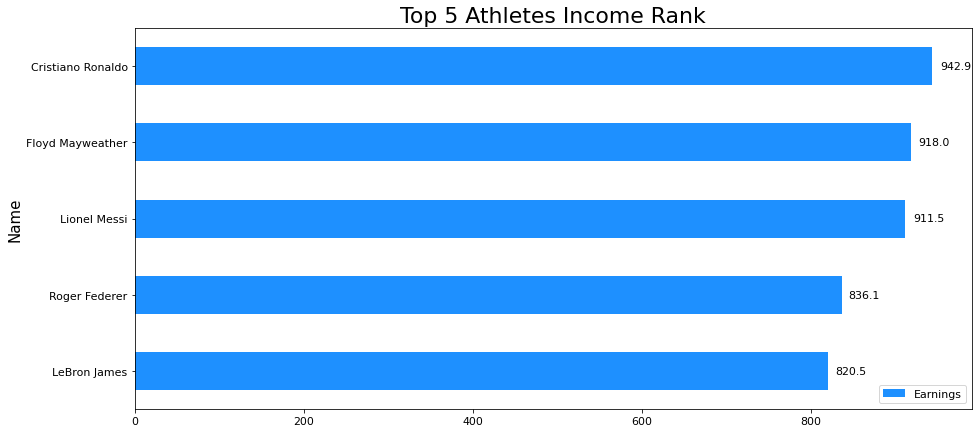

In [10]:
top = pd.DataFrame(athlete_total)
topincome = top.iloc[367:372]
plt.rc('font', size=11)
plt.rc('axes', titlesize=22)
plt.rc('axes', labelsize=15)
ax = topincome.plot(kind='barh', figsize=(15, 7), title='Top 5 Athletes Income Rank', color='dodgerblue')
for p in ax.patches:
    x, y, width, height = p.get_bbox().bounds
    ax.text(width*1.01, y+height/2, "%.1f"%(width), va='center')

##Changes in the income of a particular player during the period
자신이 알고싶은 특정 선수의 해당 기간동안의 수입 변화를 나타낸다.
(line plot 사용)

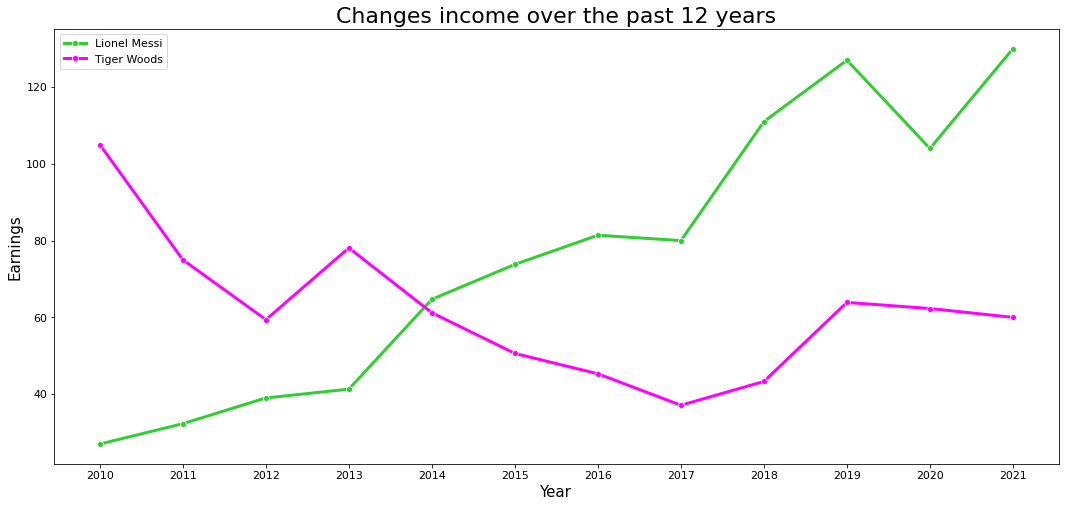

In [15]:
df1 = df.loc[:, ['Name', 'Earnings', 'Year']]
df2 = df1.loc[df1['Name']=='Lionel Messi']
df3 = df1.loc[df1['Name']=='Tiger Woods']
fig = plt.figure(figsize=(18,8))
plt.title('Changes income over the past 12 years',fontsize=22)
plt.xlabel('Year')
plt.ylabel('Earnings')
sns.lineplot(x=df2['Year'], y=df2['Earnings'], label = 'Lionel Messi', linewidth=3, color='limegreen', marker="o")
sns.lineplot(x=df3['Year'], y=df3['Earnings'], label = 'Tiger Woods', linewidth=3, color='magenta', marker="o")
plt.xticks(np.arange(2010, 2022), ('2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021'))
plt.show()

##Information on the player's income with the highest income
각 해마다 수입이 가장 많은 선수의 수입 정보를 그래프로 나타낸다.
bar plot

In [36]:
for i in range(2010,2022):
  data_i = df[df['Year']==i][:1]

data_2021

NameError: ignored

##The sports type of player who earned the most income & Percentage of each sport
각 해마다 가장 많은 수입을 기록한 선수의 스포츠 종류를 종합해보고 그 중에서 각 스포츠의 비율이 어떻게 되는지 나타낸다.
pie plot